In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv(r"/previous_application.csv")
data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,1491628,377001,Consumer loans,NaN,102595.5,102595.5,0.0,102595.5,MONDAY,12,Y,1,0.000000,NaN,NaN,XAP,Unused offer,-864,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,75,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
4192,2369081,416347,Consumer loans,3403.800,32575.5,16825.5,15750.0,32575.5,SATURDAY,13,Y,1,0.526567,NaN,NaN,XAP,Approved,-1043,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,17,Connectivity,6.0,high,POS mobile with interest,365243.0,-1001.0,-851.0,-971.0,-965.0,0.0
4193,2454726,389655,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,11,Y,1,NaN,NaN,NaN,XAP,Canceled,-89,XNA,XAP,NaN,New,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
4194,1988248,144757,Cash loans,NaN,0.0,0.0,NaN,NaN,SUNDAY,13,Y,1,NaN,NaN,NaN,XNA,Canceled,-326,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(4196, 37)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   4196 non-null   int64  
 1   SK_ID_CURR                   4196 non-null   int64  
 2   NAME_CONTRACT_TYPE           4196 non-null   object 
 3   AMT_ANNUITY                  3394 non-null   float64
 4   AMT_APPLICATION              4196 non-null   float64
 5   AMT_CREDIT                   4196 non-null   float64
 6   AMT_DOWN_PAYMENT             2321 non-null   float64
 7   AMT_GOODS_PRICE              3378 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   4196 non-null   object 
 9   HOUR_APPR_PROCESS_START      4196 non-null   int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  4196 non-null   object 
 11  NFLAG_LAST_APPL_IN_DAY       4196 non-null   int64  
 12  RATE_DOWN_PAYMENT            2321 non-null   float64
 13  RATE_INTEREST_PRIM

In [ ]:
data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [ ]:
data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True
4192,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4193,False,False,False,True,False,False,True,True,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True
4194,False,False,False,True,False,False,True,True,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True


***CLEANING DATASET***

In [ ]:
data.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       4178
RATE_INTEREST_PRIMARY          4178
NAME_TYPE_SUITE                2008
RATE_DOWN_PAYMENT              1875
AMT_DOWN_PAYMENT               1875
NFLAG_INSURED_ON_APPROVAL      1523
DAYS_FIRST_DRAWING             1523
DAYS_FIRST_DUE                 1523
DAYS_LAST_DUE_1ST_VERSION      1523
DAYS_LAST_DUE                  1523
DAYS_TERMINATION               1523
AMT_GOODS_PRICE                 818
AMT_ANNUITY                     802
CNT_PAYMENT                     802
SELLERPLACE_AREA                  0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
NAME_YIELD_GROUP                  0
NAME_SELLER_INDUSTRY              0
NAME_GOODS_CATEGORY               0
PRODUCT_COMBINATION               0
NAME_PORTFOLIO                    0
SK_ID_PREV                        0
NAME_CLIENT_TYPE                  0
CODE_REJECT_REASON                0
SK_ID_CURR                        0
DAYS_DECISION                     0
NAME_CONTRACT_STATUS        

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4191    False
4192    False
4193    False
4194    False
4195    False
Length: 4196, dtype: bool

In [ ]:
data.duplicated().sum()

0

In [ ]:
#cleaning the data
# removing columns with more than 50% null values
x= data.isnull().mean().sort_values(ascending=False)*100
print(x.to_string())

RATE_INTEREST_PRIVILEGED       99.571020
RATE_INTEREST_PRIMARY          99.571020
NAME_TYPE_SUITE                47.855100
RATE_DOWN_PAYMENT              44.685415
AMT_DOWN_PAYMENT               44.685415
NFLAG_INSURED_ON_APPROVAL      36.296473
DAYS_FIRST_DRAWING             36.296473
DAYS_FIRST_DUE                 36.296473
DAYS_LAST_DUE_1ST_VERSION      36.296473
DAYS_LAST_DUE                  36.296473
DAYS_TERMINATION               36.296473
AMT_GOODS_PRICE                19.494757
AMT_ANNUITY                    19.113441
CNT_PAYMENT                    19.113441
SELLERPLACE_AREA                0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
NAME_GOODS_CATEGORY             0.000000
PRODUCT_COMBINATION             0.000000
NAME_PORTFOLIO                  0.000000
SK_ID_PREV                      0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REAS

In [ ]:
data =data.drop(["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY"],axis=1)

In [ ]:
data=data.loc[:,(x<=40)]

In [ ]:
data.shape

(4196, 32)

In [ ]:
data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,4.196000e+03,4196.000000,3394.000000,4.196000e+03,4.196000e+03,3.378000e+03,4196.000000,4196.000000,4196.000000,4.196000e+03,3394.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,1.925214e+06,279093.381792,14055.391724,1.508402e+05,1.692534e+05,1.873669e+05,12.606053,0.995710,-932.831268,1.342132e+03,14.285798,343737.764684,14641.082305,31577.251777,74066.055743,79284.543584,0.271605
std,5.357930e+05,101311.975416,12710.391539,2.559279e+05,2.813506e+05,2.729813e+05,3.318306,0.065364,809.888863,6.176444e+04,12.801331,86105.767096,74356.562642,103857.292043,147895.111805,151557.068877,0.444870
min,1.000140e+06,100077.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,-2920.000000,-1.000000e+00,0.000000,-2870.000000,-2889.000000,-2783.000000,-2829.000000,-2725.000000,0.000000
25%,1.471491e+06,192871.500000,5968.428750,2.513588e+04,2.891362e+04,4.690800e+04,10.000000,1.000000,-1452.500000,-1.000000e+00,6.000000,365243.000000,-1690.000000,-1344.000000,-1395.000000,-1347.000000,0.000000
50%,1.918196e+06,277871.500000,10030.185000,6.781275e+04,7.490025e+04,9.221175e+04,12.000000,1.000000,-612.500000,2.500000e+01,12.000000,365243.000000,-811.000000,-409.000000,-543.000000,-508.000000,0.000000
75%,2.385848e+06,366161.500000,17439.086250,1.485000e+05,1.707041e+05,1.825774e+05,15.000000,1.000000,-299.000000,1.422500e+02,18.000000,365243.000000,-389.000000,79.000000,-88.000000,-53.000000,1.000000
max,2.843527e+06,456210.000000,131892.660000,2.700000e+06,3.020760e+06,2.700000e+06,22.000000,1.000000,-3.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
data.describe(include='object')

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,4196,4196,4196,4196,4196,4196,4196,2188,4196,4196,4196,4196,4196,4196,4196,4196
unique,3,7,2,18,4,4,8,7,4,23,4,3,8,10,5,17
top,Consumer loans,FRIDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Country-wide,XNA,XNA,POS household with interest
freq,2234,675,4173,2709,2754,2740,3369,1214,2960,1998,2122,2924,1527,1688,1177,850


In [ ]:
data.describe(include='int')

,SK_ID_PREV,SK_ID_CURR,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,4.196000e+03,4196.000000,4196.000000,4196.000000,4196.000000,4.196000e+03
mean,1.925214e+06,279093.381792,12.606053,0.995710,-932.831268,1.342132e+03
std,5.357930e+05,101311.975416,3.318306,0.065364,809.888863,6.176444e+04
min,1.000140e+06,100077.000000,1.000000,0.000000,-2920.000000,-1.000000e+00
25%,1.471491e+06,192871.500000,10.000000,1.000000,-1452.500000,-1.000000e+00
50%,1.918196e+06,277871.500000,12.000000,1.000000,-612.500000,2.500000e+01
75%,2.385848e+06,366161.500000,15.000000,1.000000,-299.000000,1.422500e+02
max,2.843527e+06,456210.000000,22.000000,1.000000,-3.000000,4.000000e+06


In [ ]:
data=data.fillna(0)

In [ ]:
data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_DUE                  0
DAYS_TERMI

**OUTLAYERS**

<Axes: ylabel='AMT_ANNUITY'>

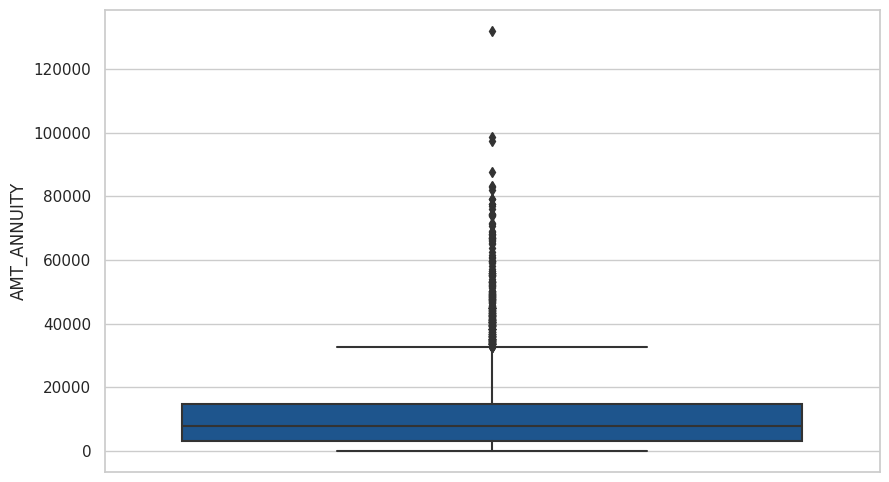

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, y=data['AMT_ANNUITY'])

<Axes: ylabel='AMT_APPLICATION'>

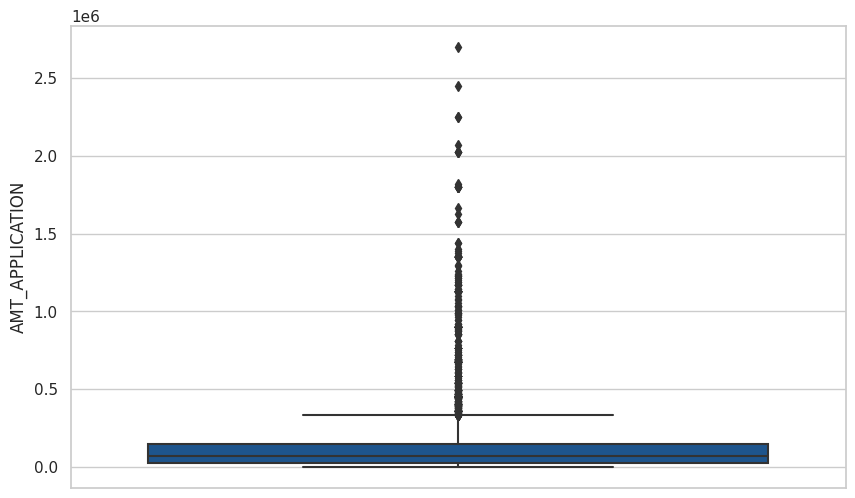

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, y=data['AMT_APPLICATION'])

<Axes: ylabel='AMT_CREDIT'>

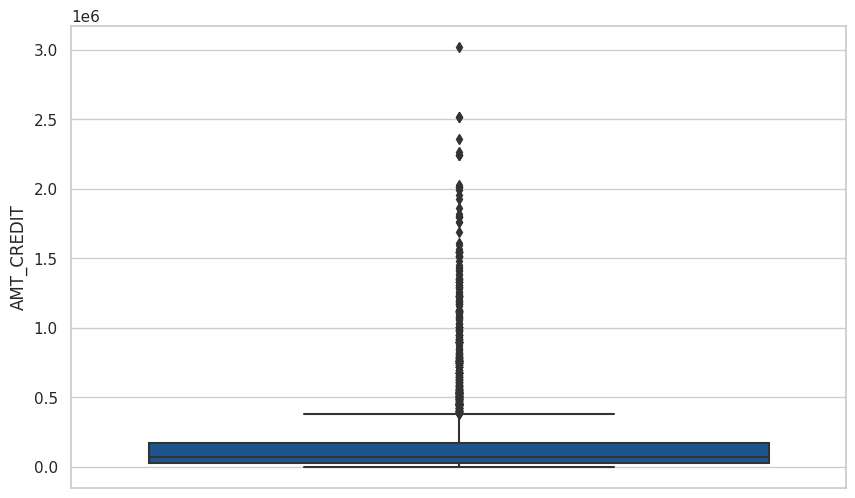

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, y=data['AMT_CREDIT'])

<Axes: ylabel='AMT_GOODS_PRICE'>

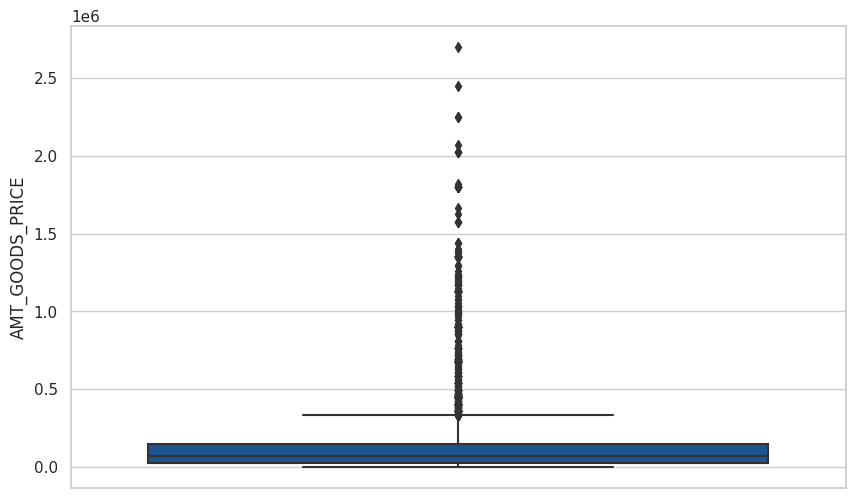

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, y=data['AMT_GOODS_PRICE'])

<Axes: ylabel='CNT_PAYMENT'>

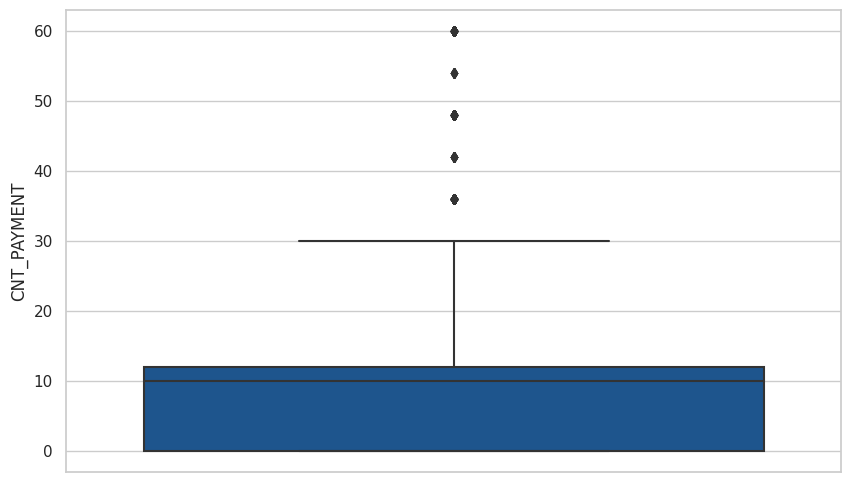

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, y=data['CNT_PAYMENT'])

**CORRELATION**

In [ ]:
matrix=data.corr()
print(matrix)

                           SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000   -0.010900     0.007400   
SK_ID_CURR                  -0.010900    1.000000     0.015286   
AMT_ANNUITY                  0.007400    0.015286     1.000000   
AMT_APPLICATION              0.014361    0.021656     0.812027   
AMT_CREDIT                   0.017912    0.020739     0.825403   
AMT_GOODS_PRICE              0.014361    0.021656     0.812027   
HOUR_APPR_PROCESS_START     -0.003749    0.010033    -0.005232   
NFLAG_LAST_APPL_IN_DAY      -0.009431    0.025334     0.000725   
DAYS_DECISION                0.008259   -0.042605     0.072028   
SELLERPLACE_AREA             0.024869   -0.001165    -0.007857   
CNT_PAYMENT                 -0.013158    0.032337     0.509256   
DAYS_FIRST_DRAWING          -0.039725    0.012218     0.145257   
DAYS_FIRST_DUE              -0.012136    0.009322    -0.026393   
DAYS_LAST_DUE_1ST_VERSION    0.003315   -0.004409    -0.010850   
DAYS_LAST_

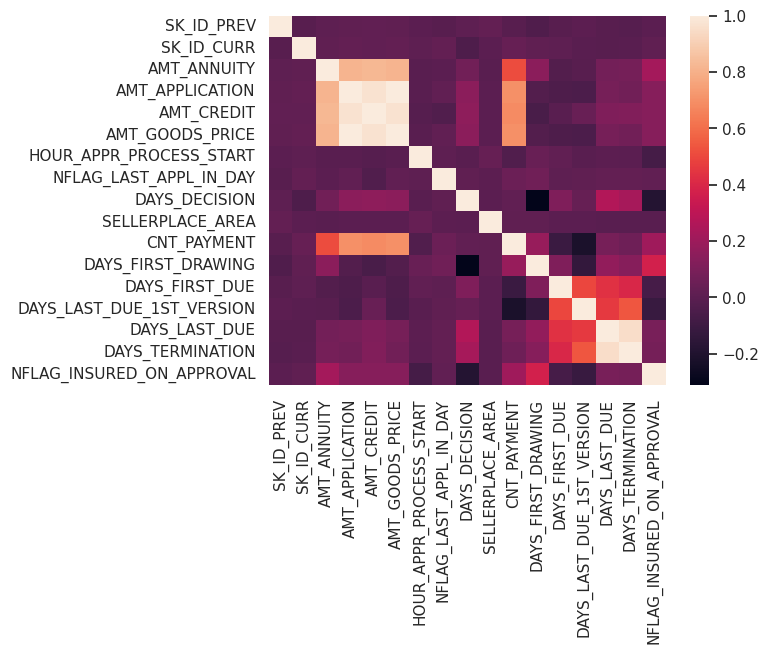

In [ ]:
sns.heatmap(matrix,annot=False)
plt.show()

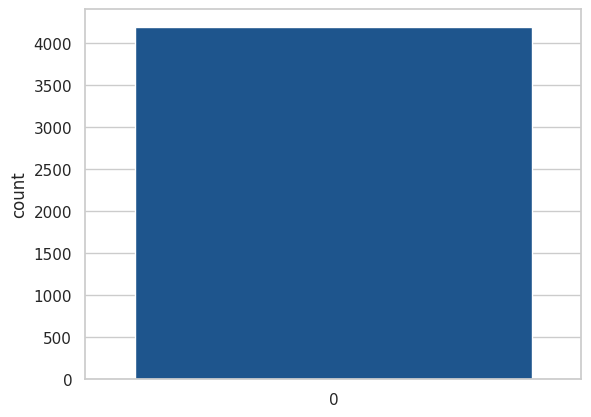

DATA IMBALANCE  0.023832221163012392 %


In [ ]:
sns.countplot(data['HOUR_APPR_PROCESS_START'])
plt.show()
print('DATA IMBALANCE ',len(data[data['HOUR_APPR_PROCESS_START']==1])/len(data['HOUR_APPR_PROCESS_START'])*100,"%")

**ANALYSIS**

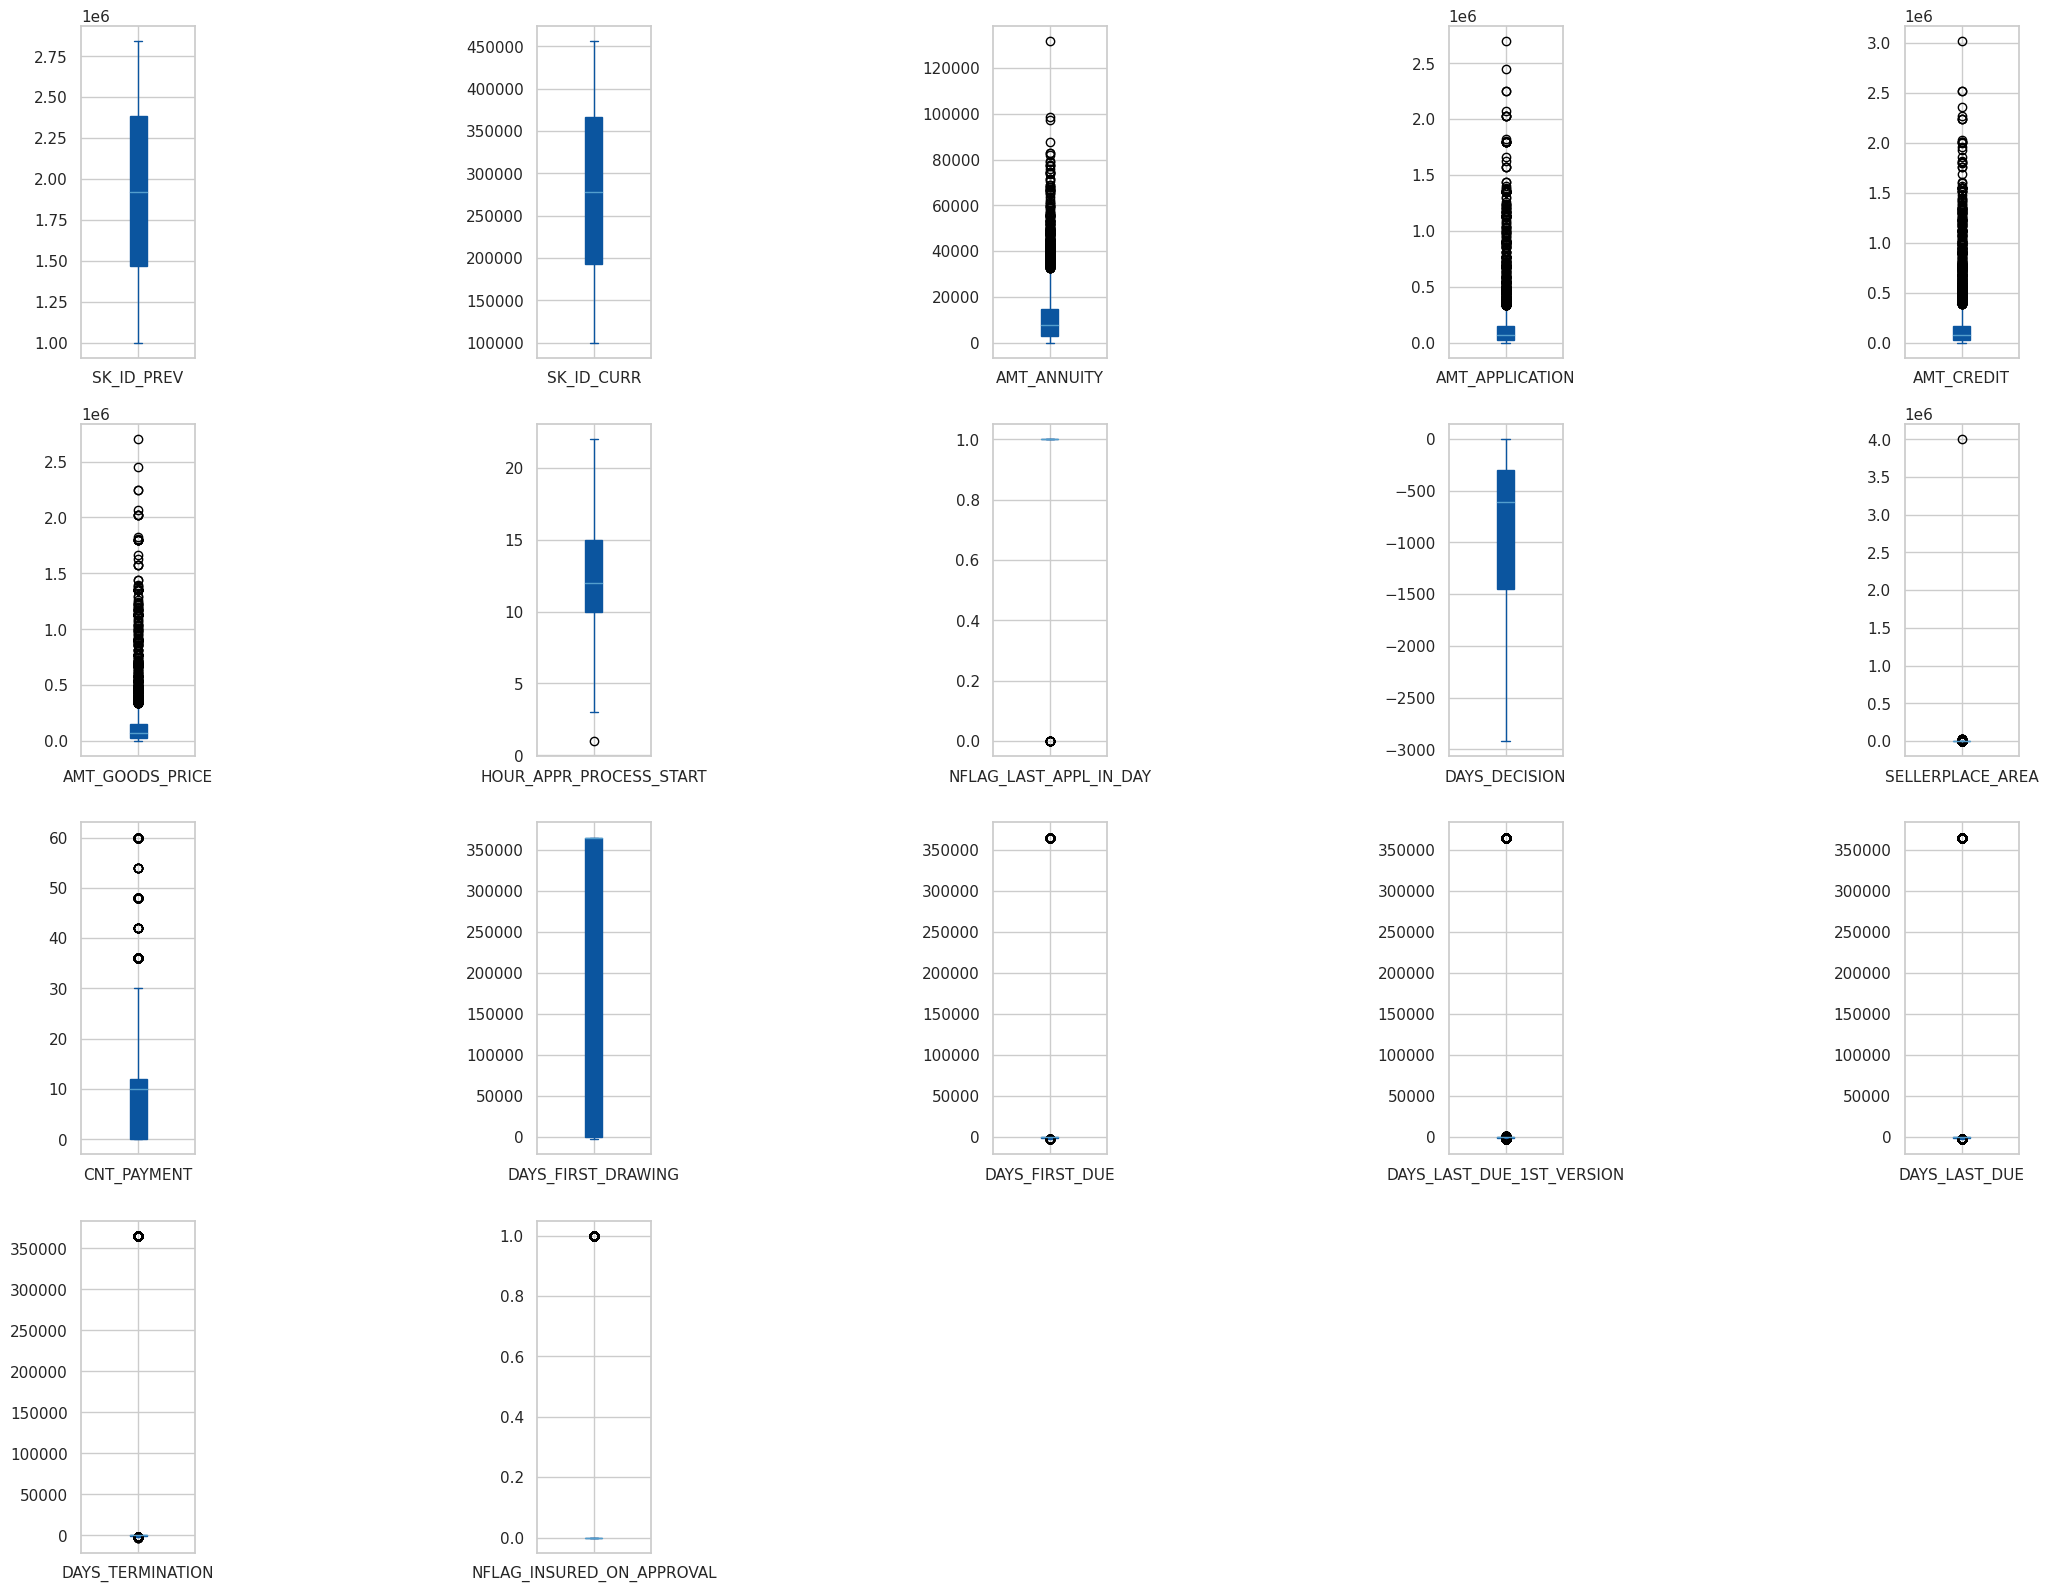

In [ ]:
data.plot(subplots=True, layout=(5,5), kind='box', figsize=(25,25), patch_artist=True)
plt.subplots_adjust(wspace=3.0);

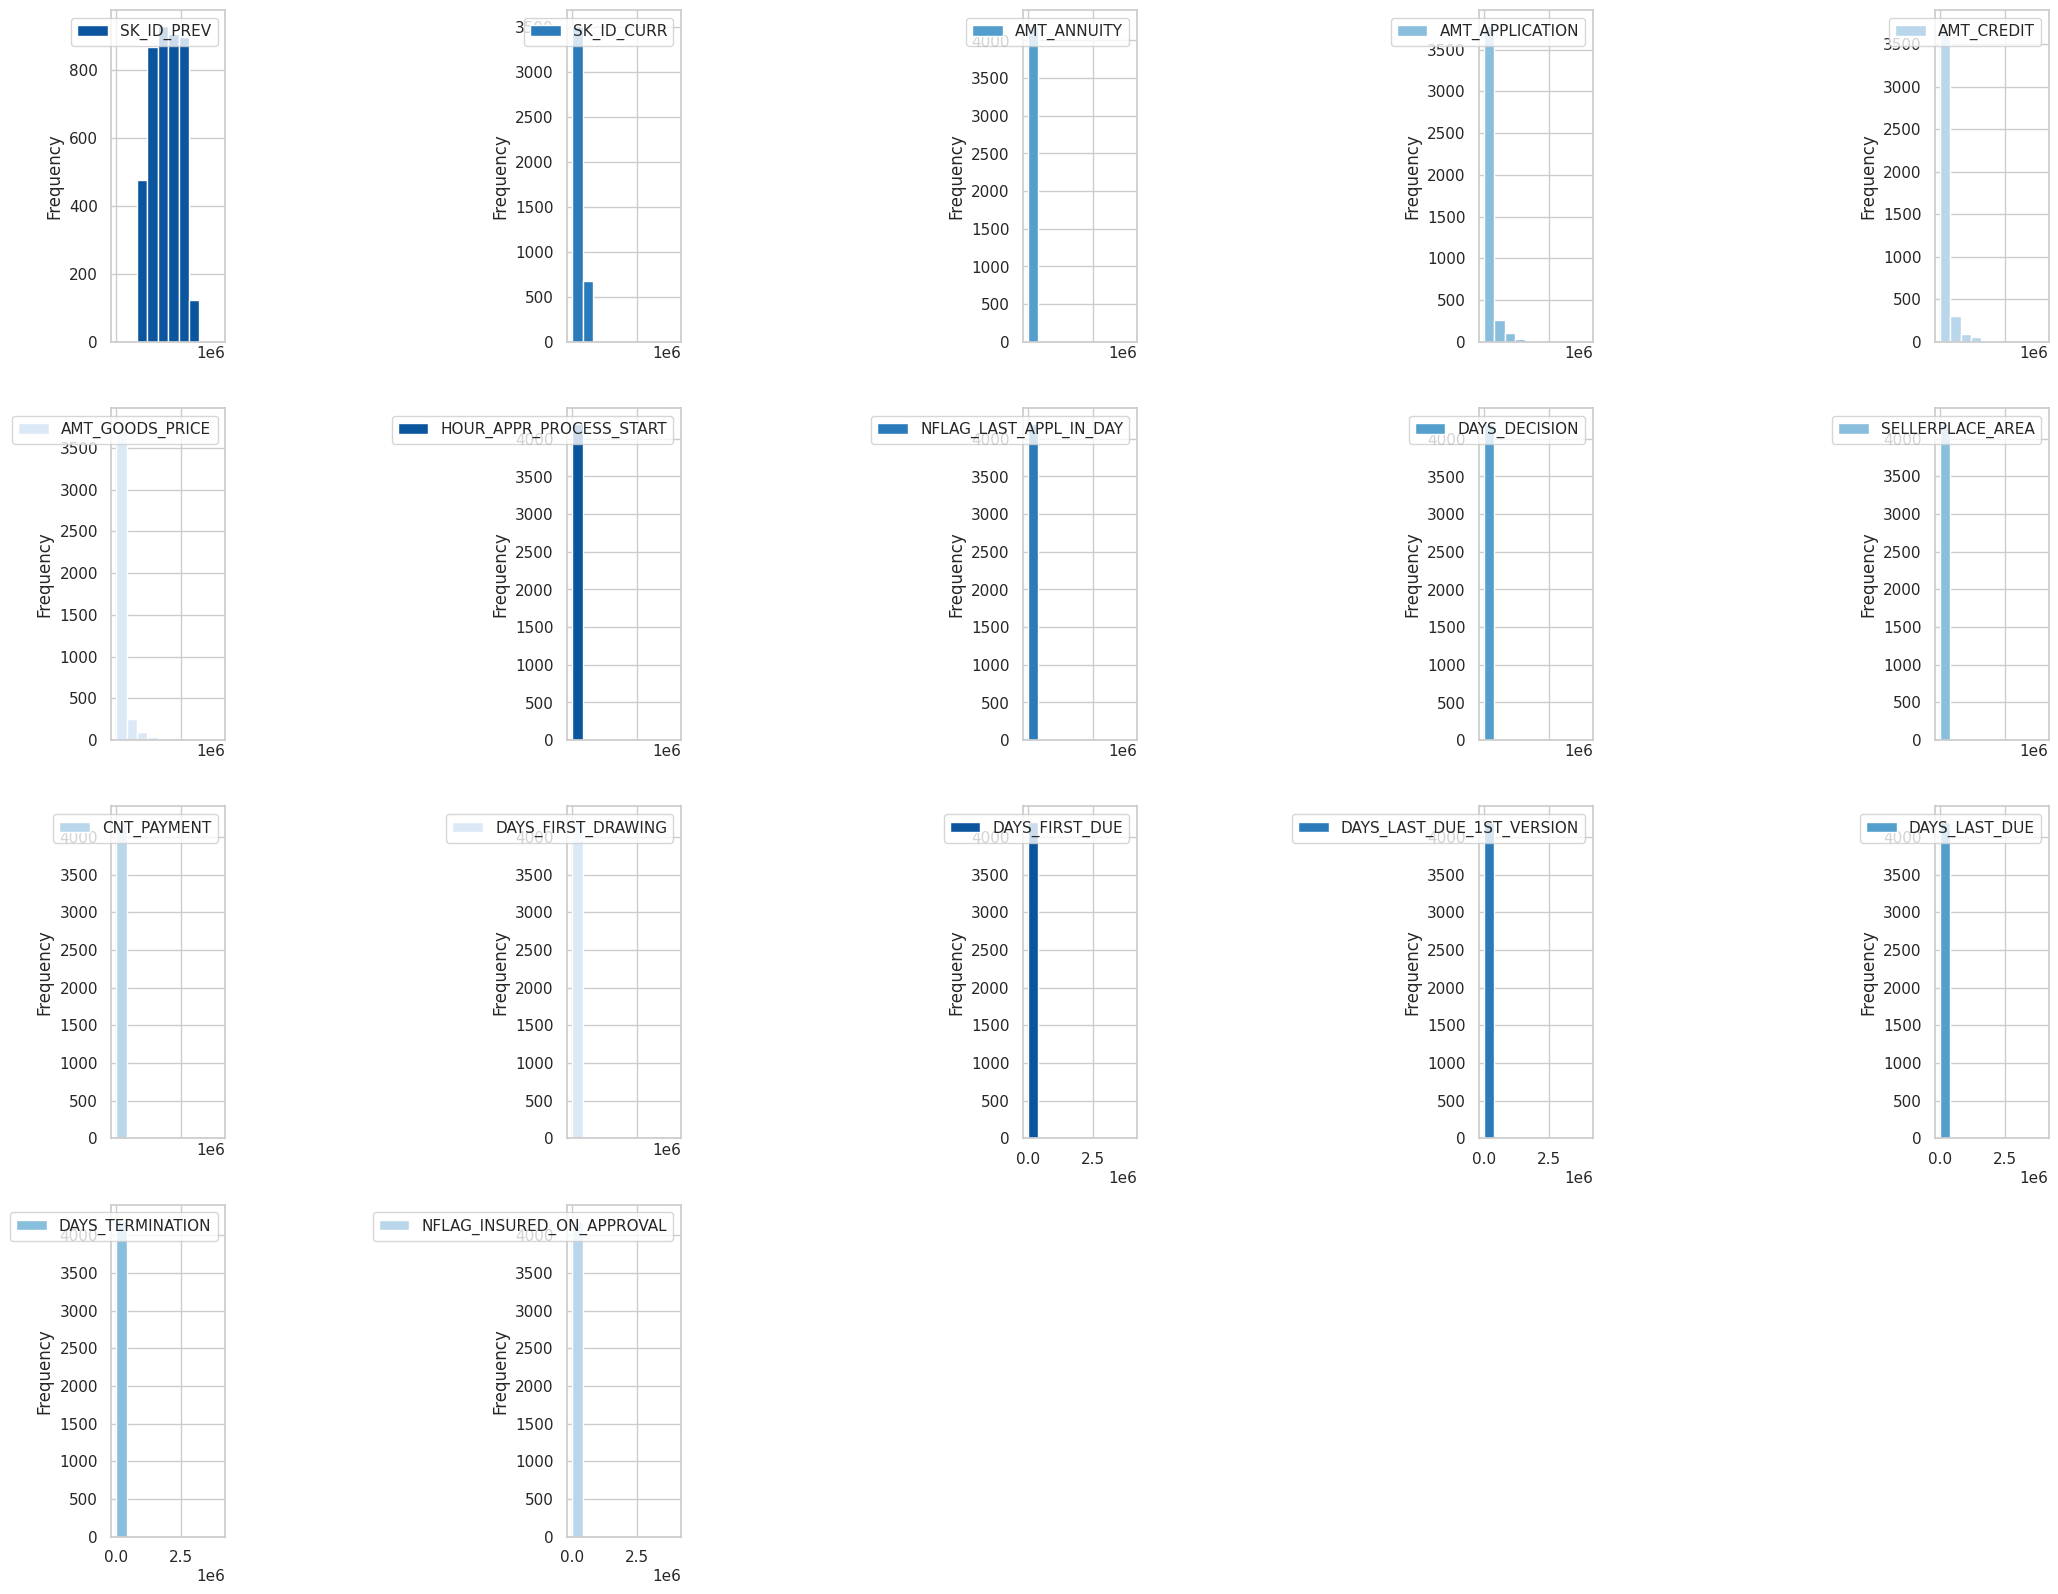

In [ ]:
data.plot(subplots=True, layout=(5,5), kind='hist', figsize=(25,25))
plt.subplots_adjust(wspace=3.0);